#### Problem 1

In [60]:
import numpy as np
from numpy import log2

def Trapezoid_data(x_data, y_data, panels) : 
    n = len(x_data) - 1

    if panels > n : 
        print(f"Panel must be less then [{n}] : [{panels}]")
        return
    
    Area = 0
    for i in range(len(x_data) - 1) : 
        width = x_data[i + 1] - x_data[i]
        height = y_data[i] + y_data[i + 1]

        area = width * height / 2
        Area += area

    return Area

def Trapezoid_func(func, a, b, panels) : 
    x_data = np.linspace(a, b, panels + 1)
    y_data = func(x_data)

    return Trapezoid_data(x_data=x_data, y_data=y_data, panels=panels)

def Recursive_Trapezoid_func(func, a, b, k, I_old=None) : 
    
    H = b - a
    if k == 1 : 
        return (func(a) + func(b)) * H / 2
    
    n = 2**(k - 2)
    h = (b - a) / n
    x = a + h / 2

    if I_old == None : 
        I_old = Trapezoid_func(func=func, a=a, b=b, panels=n)
    
    sum = 0
    for i in range(n) : 
        sum += func(x)
        x += h
    
    return (I_old + h * sum) / 2

def Recursive_Trapezoid_data(x_data, y_data, I_old=None) : 
    H = x_data[-1] - x_data[0]
    n = len(x_data) - 1

    if n != 2**int(log2(n)) : 
        print("x_data must have lenght of [2**i + 1] : [{}]".format(len(x_data)))
        return
    elif n == 1 : 
        return (y_data[0] + y_data[-1]) * H / 2

    if I_old == None : 
        I_old = Trapezoid_data(x_data=x_data, y_data=y_data, panels=2**int(log2(n) - 1))

    sum = 0
    for i in range(1, n, 2) : 
        sum += H / n * y_data[i]
    
    return I_old / 2 + sum


In [61]:
def Romberg_2D_func(func, a, b, n) : 
    R_matrix = np.zeros(shape=(n,n), dtype=float)
    R_matrix[0,0] = Recursive_Trapezoid_func(func, a, b, k=1)
    for i in range(1, n) : 
        R_matrix[i, 0] = Recursive_Trapezoid_func(
            func, a, b, k=i+1, I_old=R_matrix[i - 1, 0]
        )
    
    for j in range(1, n) : 
        for i in range(j, n) : 
            R_matrix[i,j] = (
                4**j * R_matrix[i, j - 1] - R_matrix[i - 1, j - 1]
            ) / (4**j - 1)
    
    return R_matrix


In [62]:
from numpy import log, tan, pi

def f(x) : 
    return log(1 + tan(x))

R = Romberg_2D_func(f, 0, pi / 4, n=4)

print(R, end="\n\n")
print("Most accurate : [{:.10f}]".format(R[-1,-1]))

[[0.27219826 0.         0.         0.        ]
 [0.27219826 0.27219826 0.         0.        ]
 [0.27219826 0.27219826 0.27219826 0.        ]
 [0.27219826 0.27219826 0.27219826 0.27219826]]

Most accurate : [0.2721982613]


### Problem 2

In [63]:
def Simpson_13(x_data, y_data) : 
    
    n = len(x_data)
    
    if n == 0 : 
        h = (x_data[2] - x_data[0]) / 2
        return (y_data[0] + 4 * y_data[1] + y_data[2]) * h / 3
    
    sum = 0
    for i in range(0, n - 2, 2) : 
        h = (x_data[i + 2] - x_data[i]) / 2
        sum += (y_data[i] + 4 * y_data[i + 1] + y_data[i + 2]) * h / 3
    
    return sum

def Simpson_38(x_data, y_data) : 
    h = np.average([x_data[i + 1] - x_data[i] for i in range(len(x_data) - 1)])
    
    return (y_data[0] + 3 * y_data[1] + 3 * y_data[2] + y_data[3]) * 3 * h / 8

def Simpson(x_data, y_data) : 
    n = len(x_data) - 1

    if n % 2 != 0 : 
        return Simpson_38(x_data[:4], y_data[:4]) + Simpson_13(x_data[3:], y_data[3:])
    else : 
        return Simpson_13(x_data, y_data)


In [64]:
from numpy import log2

def Romberg_2D_data(x_data, y_data) : 
    if len(x_data) - 1 != 2**int(log2(len(x_data) - 1)) : 
        print("x_data must have lenght of [2**i + 1] : [{}]".format(len(x_data)))
        return
    
    n = int(log2(len(x_data) - 1)) + 1

    R_matrix = np.zeros(shape=(n, n), dtype=float)

    H = x_data[-1] - x_data[0]

    for i in range(n) : 
        sum = 0
        for j in range(0, len(x_data), 2**(n - i - 1)) : 
            sum += 2 * y_data[j]
        sum -= y_data[0] + y_data[-1]

        R_matrix[i,0] = sum * H / (2**(i + 1))

    for j in range(1, n) : 
        for i in range(j, n) : 
            R_matrix[i,j] = (
                4**j * R_matrix[i, j - 1] - R_matrix[i - 1, j - 1]
            ) / (4**j - 1)
    
    return R_matrix


In [65]:
x_data = np.array([0, pi / 4, pi / 2, 3 * pi / 4, pi], dtype=float)
y_data = np.array([1, 0.3431, 0.25, 0.3431, 1], dtype=float)

trapz = Trapezoid_data(x_data, y_data, panels=4)
simp = Simpson(x_data, y_data)
romberg = Romberg_2D_data(x_data, y_data)[-1,-1]
print(
    "By Trapezoidal rule (4 panels): ".ljust(35), 
    "[{:.8f}]".format(trapz).ljust(10)
)
print(
    "By Simpson's rule : ".ljust(35), 
    "[{:.8f}]".format(simp).ljust(10)
)

print(
    "By Romberg integration : ".ljust(35), 
    "[{:.8f}]".format(romberg).ljust(10),
    end="\n\n"
)

print("We CAN NOT evalute it's accuracy since we have few data.")

By Trapezoidal rule (4 panels):     [1.52068792]
By Simpson's rule :                 [1.37308543]
By Romberg integration :            [1.35990470]

We CAN NOT evalute it's accuracy since we have few data.


For example, let's consider the cubic spline with data



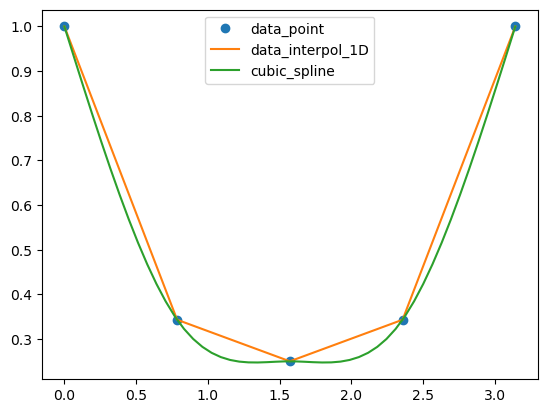

You can see there's huge gap between cubic splines and 1 order interpolation.
Since we don't know the true function of data,
it's far more dangerous to say which method has highest accuracy.


In [66]:
print("For example, let's consider the cubic spline with data", end="\n\n")

import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

CS = CubicSpline(x_data, y_data, bc_type='natural')
plt.plot(x_data, y_data, 'o', label="data_point")
plt.plot(x_data, y_data, label="data_interpol_1D")
plt.plot(
    np.linspace(min(x_data), max(x_data)), 
    CS(np.linspace(min(x_data), max(x_data))), label="cubic_spline"
)
plt.legend()
plt.show()

print("You can see there's huge gap between cubic splines and 1 order interpolation.")
print("Since we don't know the true function of data,")
print("it's far more dangerous to say which method has highest accuracy.")

### Problem 3

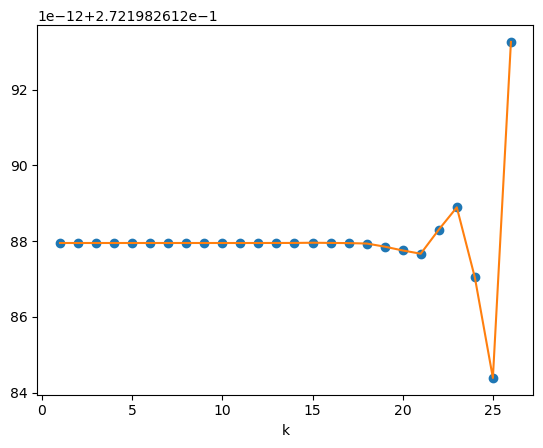

It seems like there's no improvemence adding more panels.
But after k=17, rapid change has been occurred.


In [68]:
import numpy as np
import matplotlib.pylab as plt
from numpy import pi, tan, log

def f(x) : 
    return log(1 + tan(x))

integ_list = [Recursive_Trapezoid_func(f, 0, pi/4, k=1)]
for i in range(25) : 
    integ_list.append(Recursive_Trapezoid_func(f, 0, pi/4, k=i+1, I_old=integ_list[-1]))

plt.plot([i + 1 for i in range(len(integ_list))], integ_list, 'o')
plt.plot([i + 1 for i in range(len(integ_list))], integ_list)
plt.xlabel("k")
plt.show()

print("It seems like there's no improvemence adding more panels.")
print("But after k=17, rapid change has been occurred.")

The reason of rapid change is due to the function it self


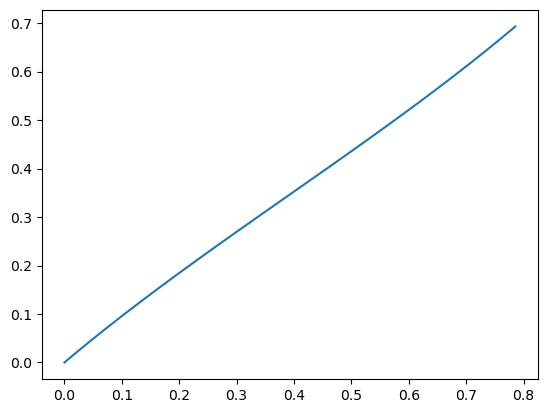

When you look closer to the function,
it looks perfect line but there's small curvature.
Since function is almost linear, adding few panels will affect almost nothing.
However if we add enough panels to recognize function's curvature,
it will affect immediately.
That's why the rapid chnage has been occurred.


In [69]:
print("The reason of rapid change is due to the function it self")

x_range = np.linspace(0, pi / 4, 100)
y = f(x_range)

plt.plot(x_range, y)
plt.show()

print("When you look closer to the function,")
print("it looks perfect line but there's small curvature.")
print("Since function is almost linear, adding few panels will affect almost nothing.")
print("However if we add enough panels to recognize function's curvature,")
print("it will affect immediately.")
print("That's why the rapid chnage has been occurred.")

But since we only need the integration with tolerance, we can ignore this change.
Comparing with scipy.integrate.quad, 

           Using scipy :  [0.27219826128795027]    
     Using trapezoidal :  [0.27219826129325536]    

You shall notice the error is negligible.


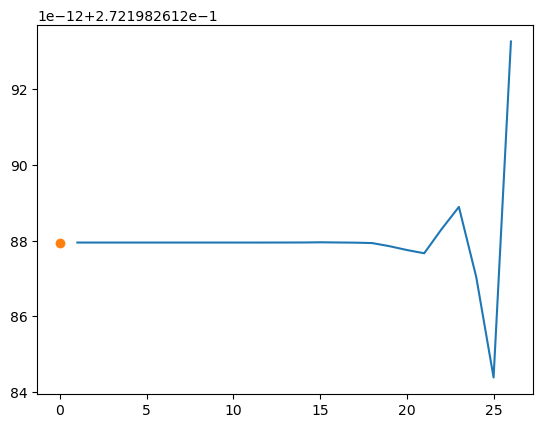

In [70]:
from scipy.integrate import quad

print("But since we only need the integration with tolerance, we can ignore this change.")
print("Comparing with scipy.integrate.quad, ", end="\n\n")
print(
    "Using scipy : ".rjust(25),
    "[{}]".format(quad(f, 0, pi / 4)[0]).ljust(25)
)
print(
    "Using trapezoidal : ".rjust(25), 
    "[{}]".format(integ_list[-1]).ljust(25),
    end="\n\n"
)

print("You shall notice the error is negligible.")

plt.plot([i + 1 for i in range(len(integ_list))], integ_list)
plt.plot([0], quad(f, 0, pi/4)[0], 'o')
plt.show()

### Problem 4

##### $$ \int_{a}^{b}f(x)dx \approx \frac{b - a}{2} \sum_{i = 1}^{n}A_{i}f(x_{i}) $$

$$
x_{i} = \frac{b + a}{2} + \frac{b - a}{2} \xi_{i}
$$

<p align="center">
    <img src="temp.png" width=500px height=250px loc="center">
</p>

$$ f(x) = \frac{\ln(x)}{x^{2} - 2x + 2} $$
$$
\int_{a}^{b} \frac{\ln(x)}{x^{2} - 2x + 2} dx
$$

In [71]:
import math
import numpy as np
def gaussNodes(m,tol=10e-9):

    def legendre(t,m):
        p0 = 1.0; p1 = t
        for k in range(1,m):
            p = ((2.0*k + 1.0)*t*p1 - k*p0)/(1.0 + k )
            p0 = p1; p1 = p
        dp = m*(p0 - t*p1)/(1.0 - t**2)
        return p,dp
    A = np.zeros(m)
    x = np.zeros(m)
    nRoots = int((m + 1)/2)
    for i in range(nRoots):
        t = math.cos(math.pi*(i + 0.75)/(m + 0.5))
        for j in range(30):
            p,dp = legendre(t,m)
            dt = -p/dp; t = t + dt
            if abs(dt) < tol:
                x[i] = t; x[m-i-1] = -t
                A[i] = 2.0/(1.0 - t**2)/(dp**2)
                A[m-i-1] = A[i]
                break
    return x,A

def gaussQuad(f,a,b,m):
    c1 = (b + a)/2.0
    c2 = (b - a)/2.0
    x,A = gaussNodes(m)
    sum = 0.0
    for i in range(len(x)):
        sum = sum + A[i]*f(c1 + c2*x[i])
    return c2*sum


In [72]:
from numpy import log, pi

def f(x) : 
    return log(x) / (x**2 - 2 * x + 2)

node_2 = gaussQuad(f, 1, pi, 2)
node_4 = gaussQuad(f, 1, pi, 4)

print("2 node : [{}]".format(node_2))
print("4 node : [{}]".format(node_4))

2 node : [0.6067250072484867]
4 node : [0.5847680362120717]


### Problem 5

In [73]:
from numpy import pi, sqrt, exp

def f(x) : 
    return exp(-1 * x**2)

k = 1
value = sqrt(pi)
pred = Recursive_Trapezoid_func(f, -10, 10, k=k)
tol = 1.0e-10
while abs(value - pred) >= tol : 
    k += 1
    pred = Recursive_Trapezoid_func(f, -10, 10, k=k, I_old=pred)

    if k >= 20 : 
        print("failed to converge")
        break

print("k : [{}]".format(k))
print("sqrt(pi) : ".ljust(20), "[{}]".format(value).ljust(20))
print("Trapezoid : ".ljust(20), "[{}]".format(pred).ljust(20))
print("Error : ".ljust(20), "[{}]".format(value - pred).ljust(20))


k : [6]
sqrt(pi) :           [1.7724538509055159]
Trapezoid :          [1.772453850943242] 
Error :              [-3.7726044510577594e-11]


### Problem 6

In [74]:
x_data = np.arange(0, 0.81, 0.16)
y_data = np.array([0.2, 1.2969, 1.7434, 3.1860, 3.1819, 0.232])

print("x_data : ", x_data)

simp = Simpson(x_data=x_data, y_data=y_data)

print("Simpson : [{}]".format(simp))


x_data :  [0.   0.16 0.32 0.48 0.64 0.8 ]
Simpson : [1.611512666666667]


### Problem 7

In [75]:
import numpy as np

def romberg(f,a,b,tol=1.0e-6):
    def richardson(r,k):
        for j in range(k-1,0,-1):
            const = 4.0**(k-j)
            r[j] = (const*r[j+1] - r[j])/(const - 1.0)
        return r

    r = np.zeros(21)
    r[1] = Recursive_Trapezoid_func(f, a, b, 1)
    r_old = r[1]
    for k in range(2,21):
        r[k] = Recursive_Trapezoid_func(f, a, b, k=k, I_old=r[k-1])
        r = richardson(r,k)
        if abs(r[1]-r_old) < tol*max(abs(r[1]),1.0):
            return r[1],2**(k-1)
        r_old = r[1]
    print("Romberg quadrature did not converge")


In [76]:
# using romberg integration

G = 6.673e-11   # J * m / kg^2
M = 5.972e+24   # kg
R = 6371e+3     # km --> m
m = 200         # kg

def U(x) : 
    return G * M * m / x**2     # J / m

H = [h * 1.0e+3 for h in [550, 1150, 340]]      # km --> m
Num = [1600, 2800, 7500]
Energy = 0

for height, num in zip(H, Num) : 
    integ = romberg(U, R, R + height, tol=1.0e-9)[0]
    Energy += integ * num

print("Required total work :", "[{:.5e}] kJ".format(Energy * 1.0e-3))

Required total work : [1.17002e+10] kJ
